In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

metrics = ["R^2 Score", "MAE", "MSE", "RMSE", "Accuracy", "Recall"]
models = {
    "Model 1": [0.4452, 0.1217, 0.0263, 0.1621, 0.6199, 0.9309],
    "Model 2": [0.4699, 0.1182, 0.0252, 0.1586, 0.6185, 0.9331],
    "Model 3": [0.4805, 0.1186, 0.0244, 0.1563, 0.6205, 0.9401],
    "Model 4": [0.4629, 0.1223, 0.0253, 0.1589, 0.6534, 0.9150],
    "Model 5": [0.5611, 0.1054, 0.0206, 0.1436, 0.6502, 0.9453],
}

df = pd.DataFrame(models, index=metrics).T
print(df)


         R^2 Score     MAE     MSE    RMSE  Accuracy  Recall
Model 1     0.4452  0.1217  0.0263  0.1621    0.6199  0.9309
Model 2     0.4699  0.1182  0.0252  0.1586    0.6185  0.9331
Model 3     0.4805  0.1186  0.0244  0.1563    0.6205  0.9401
Model 4     0.4629  0.1223  0.0253  0.1589    0.6534  0.9150
Model 5     0.5611  0.1054  0.0206  0.1436    0.6502  0.9453


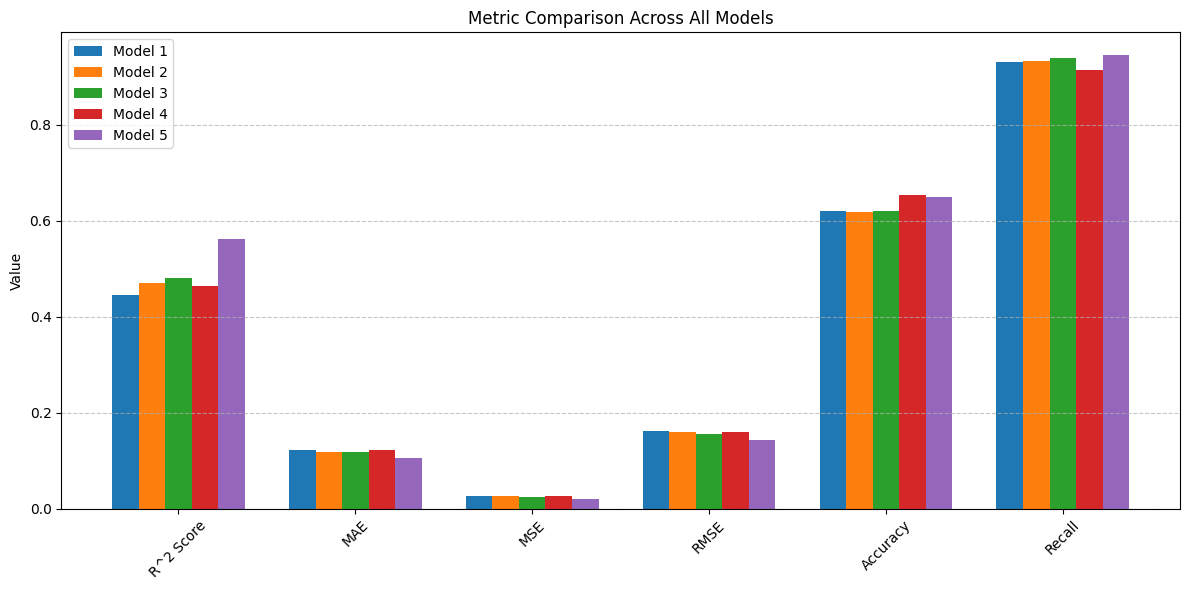

In [4]:
x = np.arange(len(metrics))
width = 0.15

plt.figure(figsize=(12, 6))
for i, (model, values) in enumerate(models.items()):
    plt.bar(x + i*width - width*2, values, width=width, label=model)

plt.xticks(x, metrics, rotation=45)
plt.ylabel("Value")
plt.title("Metric Comparison Across All Models")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

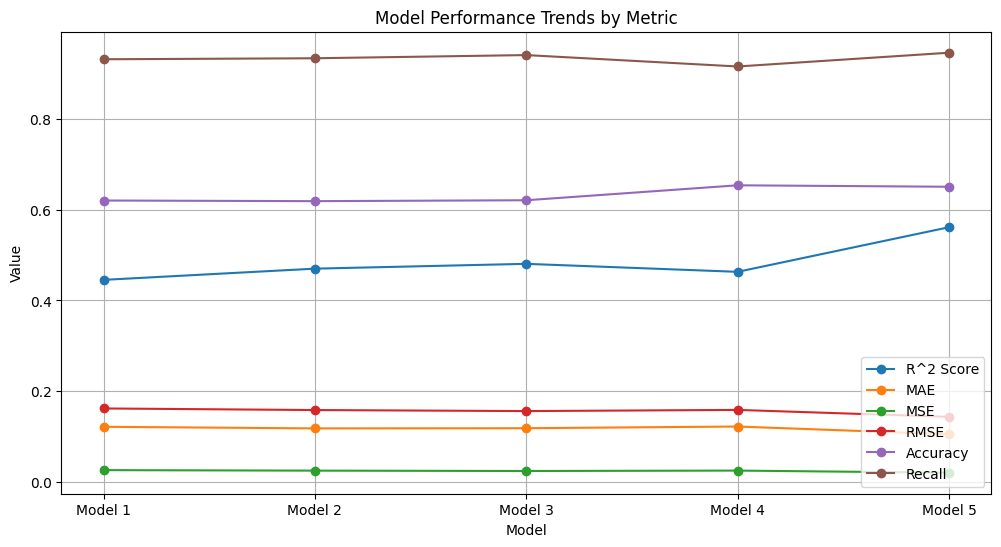

In [5]:
import pandas as pd

df = pd.DataFrame(models).T
df.columns = metrics

plt.figure(figsize=(12, 6))
for metric in df.columns:
    plt.plot(df.index, df[metric], marker='o', label=metric)

plt.title("Model Performance Trends by Metric")
plt.ylabel("Value")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


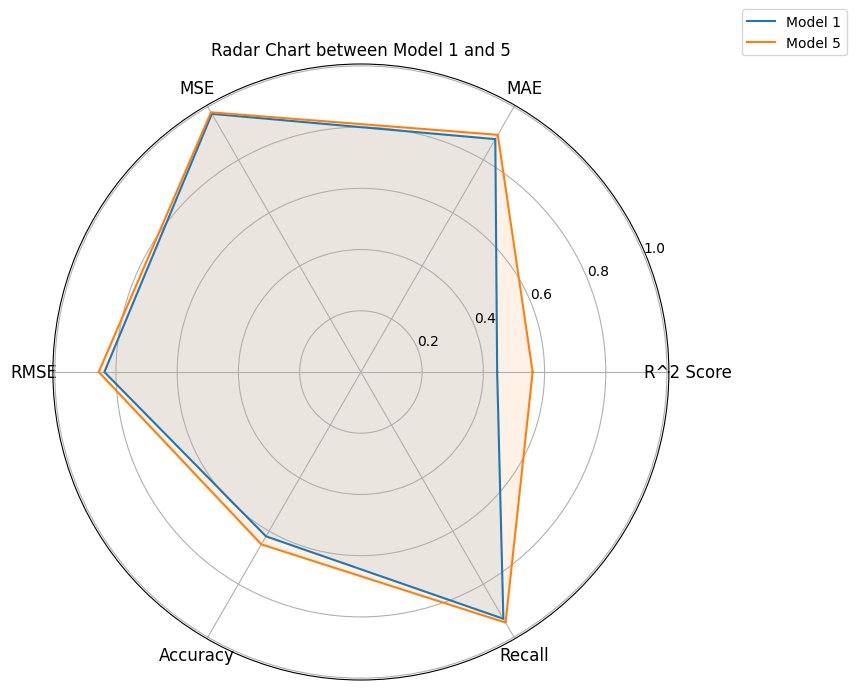

In [7]:
from math import pi
import matplotlib.pyplot as plt

def normalize(values):
    return [
        values[0],            # R2
        1 - values[1],        # MAE
        1 - values[2],        # MSE
        1 - values[3],        # RMSE
        values[4],            # Precision
        values[5]            # Recall
    ]

categories = metrics
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Seleccionar solo el primer y último modelo
models_to_plot = [list(models.keys())[0], list(models.keys())[-1]]

for model in models_to_plot:
    values = normalize(models[model])
    values += values[:1]  
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
plt.title("Radar Chart between Model 1 and 5")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


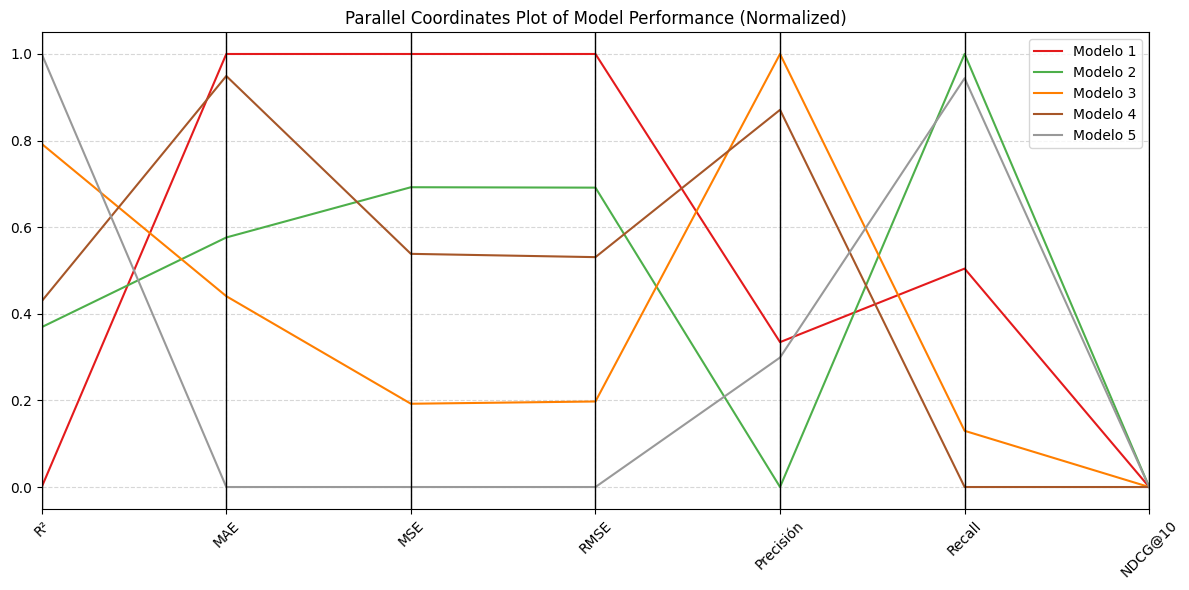

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

# Datos originales
data = {
    'Model': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'],
    'R²':        [0.4452, 0.4637, 0.4849, 0.4667, 0.4953],
    'MAE':       [0.1217, 0.1192, 0.1184, 0.1214, 0.1158],
    'MSE':       [0.0263, 0.0255, 0.0242, 0.0251, 0.0237],
    'RMSE':      [0.1621, 0.1596, 0.1556, 0.1583, 0.1540],
    'Precisión': [0.6199, 0.6020, 0.6555, 0.6486, 0.6180],
    'Recall':    [0.9309, 0.9477, 0.9182, 0.9138, 0.9458],
    'NDCG@10':   [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
}

df_plot = pd.DataFrame(data)

# Normalizar las métricas para resaltarlas en el gráfico
scaler = MinMaxScaler()
metric_columns = df_plot.columns[1:]
df_plot_scaled = df_plot.copy()
df_plot_scaled[metric_columns] = scaler.fit_transform(df_plot[metric_columns])

# Plot paralelo con datos normalizados
plt.figure(figsize=(12, 6))
parallel_coordinates(df_plot_scaled, class_column='Model', colormap=plt.get_cmap("Set1"))
plt.xticks(rotation=45)
plt.title("Parallel Coordinates Plot of Model Performance (Normalized)")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


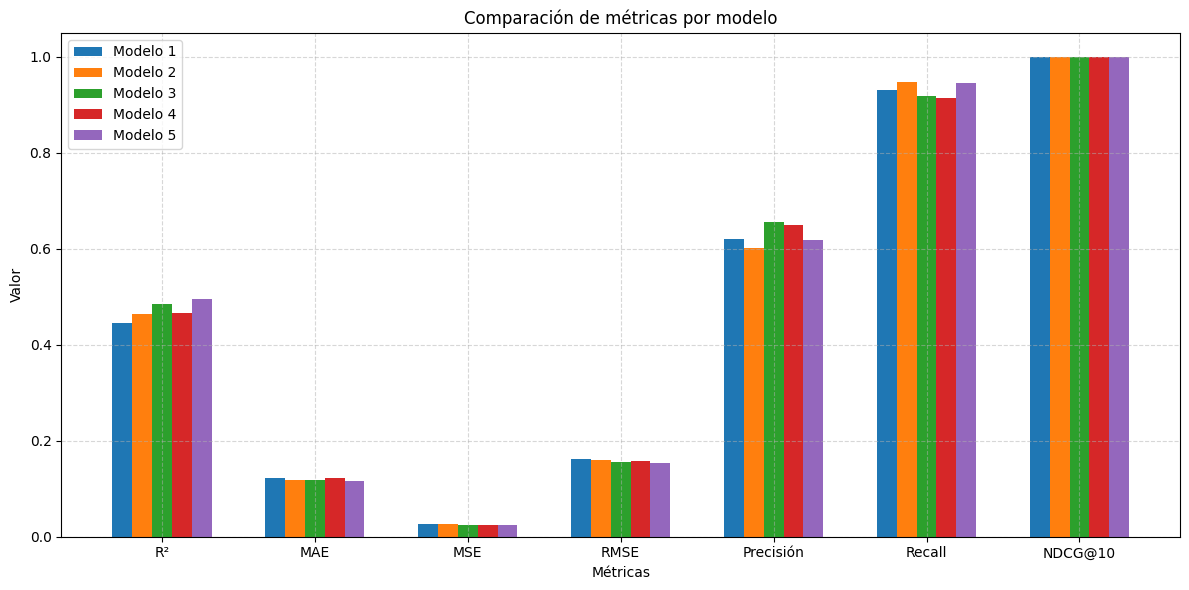

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5']

# Métricas (en el mismo orden para cada modelo)
metricas = {
    'R²':     [0.4452, 0.4637, 0.4849, 0.4667, 0.4953],
    'MAE':    [0.1217, 0.1192, 0.1184, 0.1214, 0.1158],
    'MSE':    [0.0263, 0.0255, 0.0242, 0.0251, 0.0237],
    'RMSE':   [0.1621, 0.1596, 0.1556, 0.1583, 0.1540],
    'Precisión': [0.6199, 0.6020, 0.6555, 0.6486, 0.6180],
    'Recall':    [0.9309, 0.9477, 0.9182, 0.9138, 0.9458],
    'NDCG@10':   [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
}

# Datos
metricas_nombres = list(metricas.keys())
n_metricas = len(metricas_nombres)
n_modelos = len(modelos)

# Crear gráfico
x = np.arange(n_metricas)
bar_width = 0.13

fig, ax = plt.subplots(figsize=(12, 6))

# Dibujar barras para cada modelo
for i, modelo in enumerate(modelos):
    valores = [metricas[m][i] for m in metricas_nombres]
    ax.bar(x + i * bar_width, valores, width=bar_width, label=modelo)

# Personalizar gráfico
ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas por modelo')
ax.set_xticks(x + bar_width * (n_modelos - 1) / 2)
ax.set_xticklabels(metricas_nombres)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


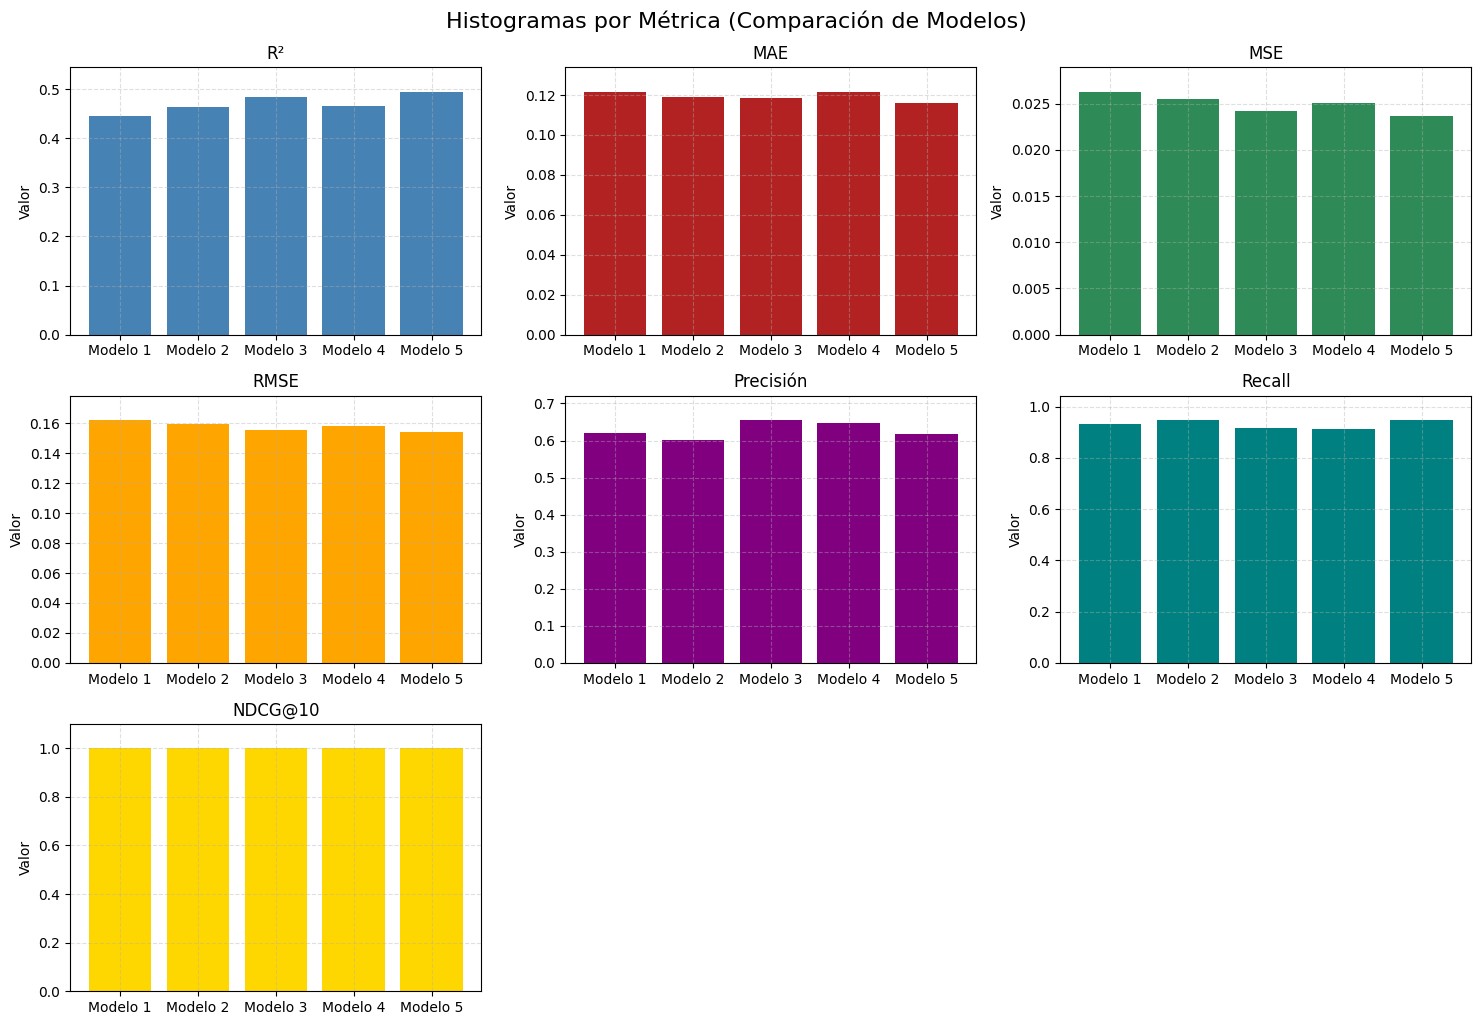

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de los modelos
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5']

metricas = {
    'R²':        [0.4452, 0.4637, 0.4849, 0.4667, 0.4953],
    'MAE':       [0.1217, 0.1192, 0.1184, 0.1214, 0.1158],
    'MSE':       [0.0263, 0.0255, 0.0242, 0.0251, 0.0237],
    'RMSE':      [0.1621, 0.1596, 0.1556, 0.1583, 0.1540],
    'Precisión': [0.6199, 0.6020, 0.6555, 0.6486, 0.6180],
    'Recall':    [0.9309, 0.9477, 0.9182, 0.9138, 0.9458],
    'NDCG@10':   [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
}

# Colores para cada métrica
colores = {
    'R²':        'steelblue',
    'MAE':       'firebrick',
    'MSE':       'seagreen',
    'RMSE':      'orange',
    'Precisión': 'purple',
    'Recall':    'teal',
    'NDCG@10':   'gold'
}

# Crear un histograma para cada métrica
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (metrica, valores) in enumerate(metricas.items()):
    ax = axes[i]
    ax.bar(modelos, valores, color=colores[metrica])
    ax.set_title(metrica)
    ax.set_ylabel('Valor')
    ax.set_ylim(0, max(valores) * 1.1)
    ax.grid(True, linestyle='--', alpha=0.4)

# Eliminar subplots vacíos si hay menos de 9
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histogramas por Métrica (Comparación de Modelos)', fontsize=16, y=1.02)
plt.show()


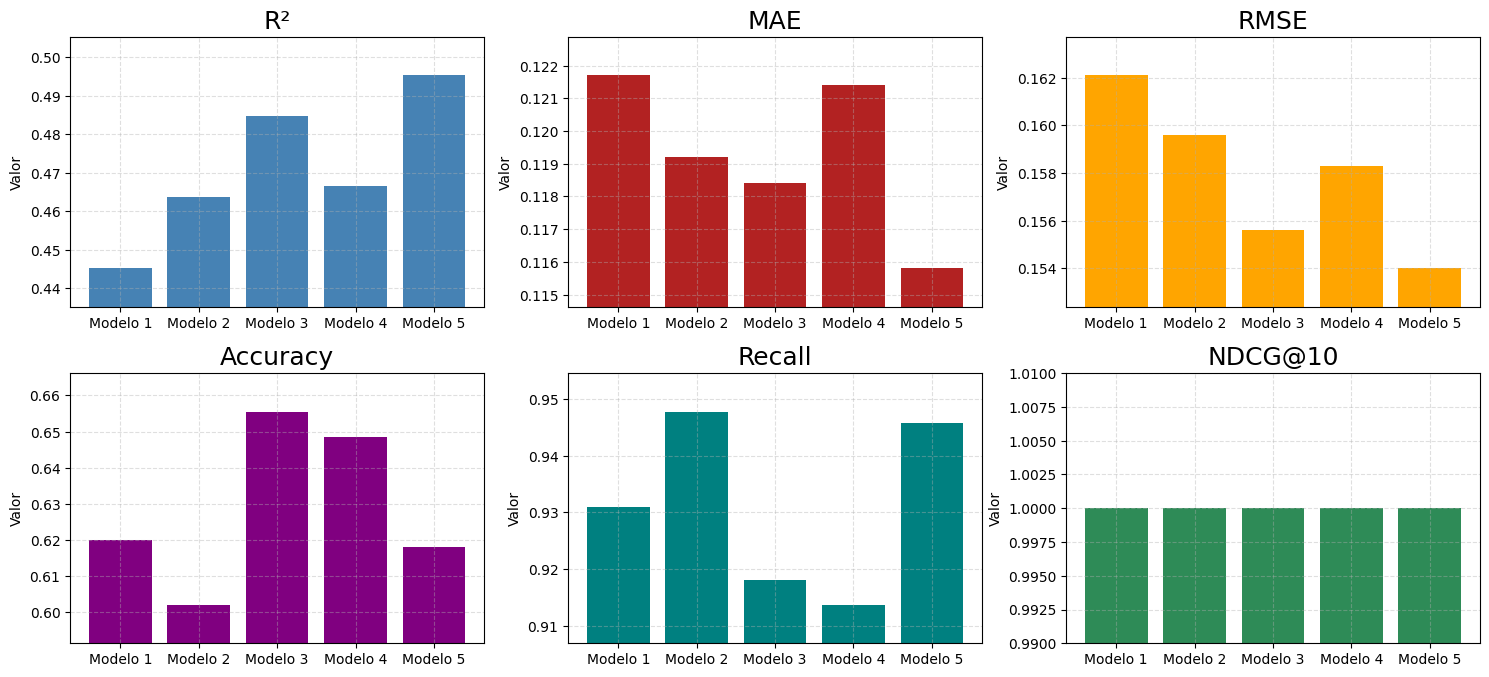

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5']

metricas = {
    'R²':        [0.4452, 0.4637, 0.4849, 0.4667, 0.4953],
    'MAE':       [0.1217, 0.1192, 0.1184, 0.1214, 0.1158],
    'RMSE':      [0.1621, 0.1596, 0.1556, 0.1583, 0.1540],
    'Accuracy': [0.6199, 0.6020, 0.6555, 0.6486, 0.6180],
    'Recall':    [0.9309, 0.9477, 0.9182, 0.9138, 0.9458],
    'NDCG@10':   [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
}

colores = {
    'R²':        'steelblue',
    'MAE':       'firebrick',
    'RMSE':      'orange',
    'Accuracy': 'purple',
    'Recall':    'teal',
    'NDCG@10':   'seagreen'
}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (metrica, valores) in enumerate(metricas.items()):
    ax = axes[i]
    ax.bar(modelos, valores, color=colores[metrica])
    ax.set_title(metrica, fontsize=18)  # Aumentar el tamaño de la fuente del título
    ax.set_ylabel('Valor')
    
    # "Zoom" dinámico del eje Y para ver mejor las diferencias
    min_val = min(valores)
    max_val = max(valores)
    delta = (max_val - min_val) * 0.2 if max_val != min_val else 0.01
    ax.set_ylim(min_val - delta, max_val + delta)

    ax.grid(True, linestyle='--', alpha=0.4)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


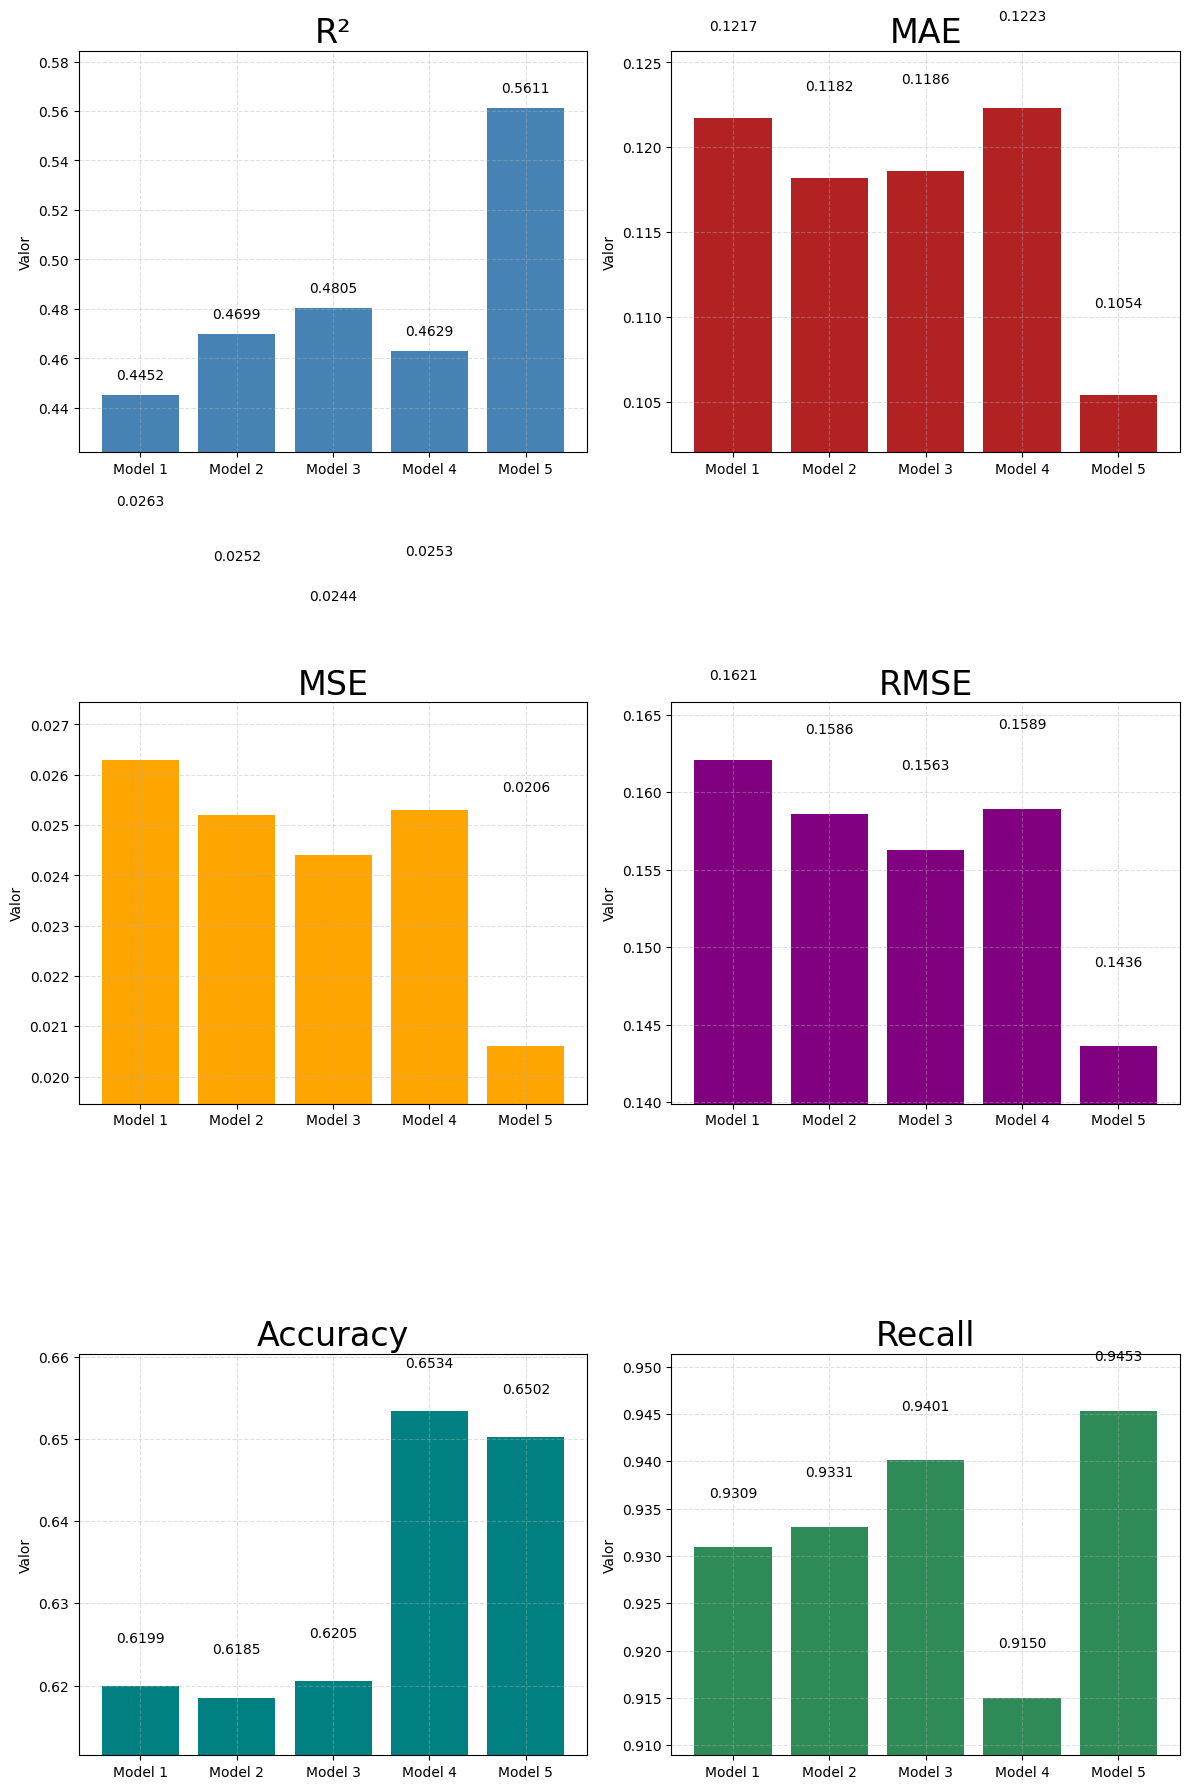

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
modelos = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

# Valores actualizados con MSE en vez de "Bias"
metricas = {
    'R²':        [0.4452, 0.4699, 0.4805, 0.4629, 0.5611],
    'MAE':       [0.1217, 0.1182, 0.1186, 0.1223, 0.1054],
    'MSE':       [0.0263, 0.0252, 0.0244, 0.0253, 0.0206],
    'RMSE':      [0.1621, 0.1586, 0.1563, 0.1589, 0.1436],
    'Accuracy':  [0.6199, 0.6185, 0.6205, 0.6534, 0.6502],
    'Recall':    [0.9309, 0.9331, 0.9401, 0.9150, 0.9453]
}

# Colores asignados por métrica
colores = {
    'R²':        'steelblue',
    'MAE':       'firebrick',
    'MSE':       'orange',
    'RMSE':      'purple',
    'Accuracy':  'teal',
    'Recall':    'seagreen'
}

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
axes = axes.flatten()

# Crear cada gráfico
for i, (metrica, valores) in enumerate(metricas.items()):
    ax = axes[i]
    bars = ax.bar(modelos, valores, color=colores[metrica])
    ax.set_title(metrica, fontsize=24)
    ax.set_ylabel('Valor')

    # Mostrar los valores encima de cada barra
    for bar, val in zip(bars, valores):
        ax.text(bar.get_x() + bar.get_width()/2, val + 0.005, f'{val:.4f}',
                ha='center', va='bottom', fontsize=10)

    # Ajustar los límites del eje Y
    min_val = min(valores)
    max_val = max(valores)
    delta = (max_val - min_val) * 0.2 if max_val != min_val else 0.01
    ax.set_ylim(min_val - delta, max_val + delta)

    ax.grid(True, linestyle='--', alpha=0.4)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
